In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import acquire_sso, prepare_sso

plt.rc('figure', figsize=(16,10))
plt.rc('font', size=14)
pd.set_option('display.max_colwidth', 250)
pd.set_option('display.max_columns', 50)

In [2]:
# if os.path.isfile('sso_dict.csv'):
#     df_dict = pd.read_csv('sso_dict.csv')
# else:
#     url_sso_dict = '''https://storage.googleapis.com/sa_saws_data/SAWS_SSO_DataFieldDescription_MM.xlsx'''
#     df_dict = pd.read_excel(url_sso_dict)
#     df_dict.to_csv('sso_dict.csv', index=False)

In [3]:
# df = acquire_sso.acquire_sso()

In [4]:
df = prepare_sso.prepare_sso_df()
df.head(1)

,SSO_ID,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,Month,Year,Week,EARZ_ZONE,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,Inches_No,RainFall_Less3,SPILL ADDRESS,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,Root_Cause,HRS_2,GAL_2,HRS_3,GAL_3,days_since_cleaned
0,6582,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.4,Grease,"Spill ContainedReturned to SystemArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,nan,3,2019,11,0.0,8.0,16.55,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaT,0.45,2019-03-10 13:43:00,False,NaN,0.0,0.0,0.0,0.0,NaN


In [5]:
df.shape

(3183, 44)

In [6]:
# df_dict.shape

In [7]:
# df_dict['Data Description'].value_counts()

In [8]:
# unused = ['Disregard','Ignore','Service Req # (internal use only)',
#           'Not Used','Old mapping system reference (internal only)']
# df_dict[df_dict['Data Description'].isin(unused)]

In [9]:
# ready1_dict = df_dict[~df_dict['Data Description'].isin(unused)]
# print(len(ready1_dict))
# ready1_dict

In [10]:
# null_fields = ['SPILL_START_2','SPILL_START_3',
#                'SPILL_STOP_2','SPILL_STOP_3']
# final_dict = ready1_dict[~ready1_dict.Field.isin(null_fields)]\
#                     .reset_index(drop=True)
# len(final_dict)

In [11]:
# final_dict

In [12]:
# features_to_use = list(final_dict.Field)
# len(features_to_use)

In [13]:
# bad_features = list(df.columns[~df.columns.isin(features_to_use)])

In [14]:
# df = df.drop(columns=bad_features)
# df = df.drop(columns = ['TIMEINT','STEPS_TO_PREVENT'])
# df.shape

In [15]:
# string_features = ['SSO_ID','SPILL_ADDRESS','COUNCIL_DISTRICT',]
# for col in string_features:
#     df[col] = df[col].astype(str)
    
# time_features = ['REPORTDATE','SPILL_START','SPILL_STOP',
#                  'ResponseDTTM', 'LASTCLND']
# for col in time_features:
#     df[col] = pd.to_datetime(df[col])
    
# fill_features = ['NUM_SPILLS_24MOS','PREVSPILL_24MOS','HRS_2',
#                 'HRS_3','GAL_2','GAL_3']
# for col in fill_features:
#     df[col] = df[col].fillna(0)
    
# df.Root_Cause = df.Root_Cause.str.strip()

In [16]:
# df['days_since_cleaned'] = (df.SPILL_START - df.LASTCLND).dt.days

In [17]:
df[df.days_since_cleaned == df.days_since_cleaned.min()]

,SSO_ID,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,Month,Year,Week,EARZ_ZONE,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,Inches_No,RainFall_Less3,SPILL ADDRESS,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,Root_Cause,HRS_2,GAL_2,HRS_3,GAL_3,days_since_cleaned
1107,3466,2014-10-05,139,ANTRIM,30,30.0,2014-10-03 18:40:00,2014-10-03 21:30:00,2.833333,Debris,"Spill ContainedArea Cleaned and DisinfectedFlushed Area with H2O, Unstopped Main,",CLEANED MAIN,SALADO CREEK,47681,47806,ALLEY,None,2.0,10,2014,41,0.0,8.0,500.0,CP,1983.0,0.0,0.0,139 Antrim Dr -Spill came from cleanouts at 151 and 155 Antrim Dr,1,1.0,0,GRAVITY,Sewer Main,2014-10-04 19:00:00,0.0,2014-10-03 18:40:00,False,STRUCTURAL,0.0,0.0,0.0,0.0,-2.0


In [18]:
features = df.isna().sum() / df.shape[0]
bad_list = features[features > .5]
print(len(bad_list))
bad_list

4


LASTCLND              0.654100
ResponseTime          0.607603
ResponseDTTM          0.607603
days_since_cleaned    0.654100
dtype: float64

In [19]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,TOTAL_GAL,GALSRET,HRS,Month,Year,Week,EARZ_ZONE,PIPEDIAM,PIPELEN,INSTYEAR,Inches_No,RainFall_Less3,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,ResponseTime,HRS_2,GAL_2,HRS_3,GAL_3,days_since_cleaned
count,3183.000000,2708.000000,3180.000000,3183.000000,3183.000000,3183.000000,1865.000000,2993.000000,2993.000000,3065.000000,2696.000000,2641.000000,3183.000000,3183.000000,1249.000000,3183.000000,3183.000000,3183.000000,3183.000000,1101.000000
mean,33115.578071,3928.728582,4.323485,6.201068,2012.904178,25.676406,0.247185,11.380722,288.262431,2019.119413,0.476495,0.517490,1.925856,0.734527,-3.698834,0.221306,3655.564562,0.022853,151.032045,266.709355
std,311114.890134,59048.789729,38.110123,3.584717,2.945651,15.626943,1.020458,10.173888,465.354265,578.614360,1.309856,1.124533,2.084671,1.211286,150.971364,2.714416,61246.087979,0.453691,4848.806471,304.310465
min,1.000000,0.000000,0.000000,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,1899.000000,0.000000,0.000000,1.000000,0.000000,-5332.500000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,50.000000,0.000000,0.750000,3.000000,2010.000000,12.000000,0.000000,8.000000,136.000000,1962.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
50%,250.000000,0.000000,1.400000,6.000000,2012.000000,24.000000,0.000000,8.000000,264.500000,1977.000000,0.000000,0.010000,1.000000,0.000000,0.450000,0.000000,0.000000,0.000000,0.000000,164.000000
75%,2435.000000,0.000000,2.816667,9.000000,2015.000000,40.000000,0.000000,8.000000,351.000000,1994.000000,0.100000,0.460000,2.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,381.000000
max,13304550.000000,2385150.000000,1796.000000,12.000000,2019.000000,53.000000,5.000000,66.000000,11689.350000,9999.000000,9.870000,12.270000,21.000000,13.000000,50.333333,118.000000,2377350.000000,15.530000,255300.000000,1935.000000


In [20]:
len(df.REPORTDATE.unique())

1878

In [21]:
df[df.NUM_SPILLS_COMPKEY == df.NUM_SPILLS_COMPKEY.max()]

,SSO_ID,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,Month,Year,Week,EARZ_ZONE,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,Inches_No,RainFall_Less3,SPILL ADDRESS,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,Root_Cause,HRS_2,GAL_2,HRS_3,GAL_3,days_since_cleaned
71,6512,2018-11-13,606,N ALAMO ST,2080,0.0,2018-11-13 08:16:00,2018-11-13 10:00:00,1.733333,Contractor,NaN,REMOVED BYPASS,DOS RIOS,STMDRAIN,NaN,STORMDRAIN - Then entered the San Antonio River,SAN ANTONIO RIVER,nan,11,2018,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALAMO ST N 00606,21,0.0,0,NaN,Bypass,NaT,0.400000,2018-11-13 08:40:00,False,CONTRACTOR,0.0,0.0,0.0,0.0,NaN
716,5863,2016-04-23,4006,BRIARGLEN,6000,NaN,2016-04-22 21:00:00,2016-04-22 23:00:00,2.000000,Other,NaN,REPAIRED PUMP,SALADO CREEK,46429,46423,CREEK BED - SPILLED INTO BEITEL CREEK,BEITEL CREEK,nan,4,2016,17,0.0,NaN,NaN,NaN,NaN,0.0,0.5,BRIARGLEN 04006,21,0.0,0,GRAVITY,Sewer Main,NaT,0.000000,2016-04-22 21:00:00,False,BY PASS PUMP LEAK,0.0,0.0,0.0,0.0,NaN
800,5774,2015-12-22,5704,PRESA ST S,90,NaN,2015-12-21 11:16:00,2015-12-21 18:00:00,6.733333,Structural,"Repaired main, 10"" sewer main",REPAIRED MAIN,DOS RIOS,NaN,NaN,DRAINAGE CULVERT,NONE,3.0,12,2015,52,0.0,NaN,NaN,NaN,NaN,0.0,0.0,STORY LN 00105,21,0.0,0,NaN,NaN,NaT,6.733333,2015-12-21 18:00:00,False,STRUCTURAL,0.0,0.0,0.0,0.0,NaN


In [22]:
df[df.TOTAL_GAL.isin(list(df.TOTAL_GAL.nlargest(8)))]

,SSO_ID,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,UNITID,UNITID2,DISCHARGE_TO,DISCHARGE_ROUTE,COUNCIL_DISTRICT,Month,Year,Week,EARZ_ZONE,PIPEDIAM,PIPELEN,PIPETYPE,INSTYEAR,Inches_No,RainFall_Less3,SPILL ADDRESS,NUM_SPILLS_COMPKEY,NUM_SPILLS_24MOS,PREVSPILL_24MOS,UNITTYPE,ASSETTYPE,LASTCLND,ResponseTime,ResponseDTTM,Public Notice,Root_Cause,HRS_2,GAL_2,HRS_3,GAL_3,days_since_cleaned
84,6499,2018-10-24,108,CHAPPIE JAMES WAY,2448400,0.0,2018-10-24 13:50:00,2018-10-28 13:29:00,95.65,I/I,NaN,MONITORED AREA,LEON CREEK,1210,42319,CREEK BED - Spilled Into Leon Creek,LEON CREEK,nan,10,2018,43,0.0,54.0,1335.00,RCP,1965.0,0.79,0.49,CHAPPIE JAMES WAY 00108,10,9.0,2018-10-15 00:00:00,OUTFALL,Sewer Main,NaT,0.0,2018-10-24 13:50:00,True,RAIN EVENT,0.0,0.0,0.0,0.0,NaN
115,6466,2018-09-20,6606,SWISS OAKS,13304550,0.0,2018-09-20 09:45:00,2018-11-19 01:30:00,620.07,I/I,NaN,MONITORED AREA,LEON CREEK,903059,71380,CREEK BED - Spilled Into Leon Creek,LEON CREEK,6.0,9,2018,38,0.0,42.0,1301.00,RCP,1973.0,0.56,0.00,SWISS OAKS 06606,5,5.0,2018-09-10 00:00:00,OUTFALL,Sewer Main,NaT,0.0,2018-09-20 09:45:00,True,RAIN EVENT,0.0,0.0,0.0,0.0,NaN
646,5942,2016-06-02,700,HOLBROOK,6026731,0.0,2016-06-02 11:09:00,2016-06-06 07:30:00,92.35,I/I,NaN,DILUTED BY HEAVY RAINWATER,SALADO CREEK,47822,922726,CREEK BED - SPILLED INTO SALADO CREEK,SALADO CREEK,2.0,6,2016,23,0.0,0.0,5.89,,1973.0,2.34,2.73,HOLBROOK 00700 - Spilled Into Salado Creek,6,6.0,2016-05-30 00:00:00,OUTFALL,Sewer Main,NaT,0.0,2016-06-02 11:09:00,True,RAIN EVENT,0.0,0.0,0.0,0.0,NaN
647,5943,2016-06-02,6606,SWISS OAKS,2050500,0.0,2016-06-02 11:45:00,2016-06-06 12:30:00,96.75,I/I,NaN,DILUTED BY HEAVY RAINWATER,LEON CREEK,903064,903061,CREEK BED - SPILLED INTO LEON CREEK,LEON CREEK,6.0,6,2016,23,0.0,0.0,16.81,,2014.0,2.34,2.73,6606 Swiss Oaks - Spilled Into Leon Creek,1,1.0,0,OUTFALL,Sewer Main,NaT,0.0,2016-06-02 11:45:00,True,RAIN EVENT,0.0,0.0,0.0,0.0,NaN
653,5922,2016-05-31,108,CHAPPIE JAMES WAY,2453340,0.0,2016-05-31 17:08:00,2016-06-01 07:02:00,13.90,I/I,NaN,DILUTED BY HEAVY RAINWATER,LEON CREEK,1187,1074,CREEK BED - SPILLED INTO LEON CREEK,LEON CREEK,nan,5,2016,23,0.0,54.0,17.61,CSC,1983.0,1.84,2.41,CHAPPIE JAMES WAY 00108,3,3.0,2016-05-16 00:00:00,SIPHON,Sewer Main,NaT,0.0,2016-05-31 17:08:00,True,RAIN EVENT,118.0,2377350.0,0.0,0.0,NaN
688,5888,2016-05-18,700,HOLBROOK,2754790,0.0,2016-05-17 18:28:00,2016-05-21 03:00:00,80.53,I/I,NaN,DILUTED BY HEAVY RAINWATER,SALADO CREEK,990827,48236,CREEK BED - Spilled Into Salado Creek,SALADO CREEK,2.0,5,2016,21,0.0,0.0,0.00,,2015.0,0.14,1.71,700 HOLBROOK,1,1.0,0,OUTFALL,Sewer Main,NaT,0.0,2016-05-17 18:28:00,True,RAIN EVENT,0.0,0.0,0.0,0.0,NaN
2338,18,2010-10-20,8600,MISSION PKWY,4442000,NaN,2010-10-20 09:00:00,2010-10-27 11:00:00,170.00,Break In Main,REPAIRED FORCE MAIN - L/S # 172,REPAIRED BROKEN MAIN,DOS RIOS,13440,14063,CREEK BED,SAN ANTONIO RIVER,3.0,10,2010,43,NaN,30.0,122.58,FRP,1990.0,0.00,0.00,MISSION PKWY 080/1,2,0.0,0,FORCE,Sewer Main,NaT,NaN,NaT,True,STRUCTURAL,0.0,0.0,0.0,0.0,NaN
2771,1796,2010-01-15,300,PETALUMA BLVD E,3570000,NaN,2010-01-15 02:00:00,2010-01-16 03:00:00,25.00,I/I,"ADDED 18"" BY PASS",ADDED BY PASS,DOS RIOS,16451,20815,CREEK BED,SIX MILE CREEK,3.0,1,2010,3,NaN,36.0,1005.00,RCP,1949.0,1.81,1.77,NaN,2,0.0,0,OUTFALL,Sewer Main,NaT,NaN,NaT,True,CONTRACTOR,0.0,0.0,0.0,0.0,NaN


In [23]:
df.Root_Cause.value_counts()

STRUCTURAL           1237
GREASE                610
DEBRIS                443
RAIN EVENT            401
CONTRACTOR            172
LIFT STATION          140
VANDALISM              72
OTHER                  62
ROOTS                  22
I/I                    12
BY PASS PUMP LEAK       3
Debris                  1
Grease                  1
Name: Root_Cause, dtype: int64

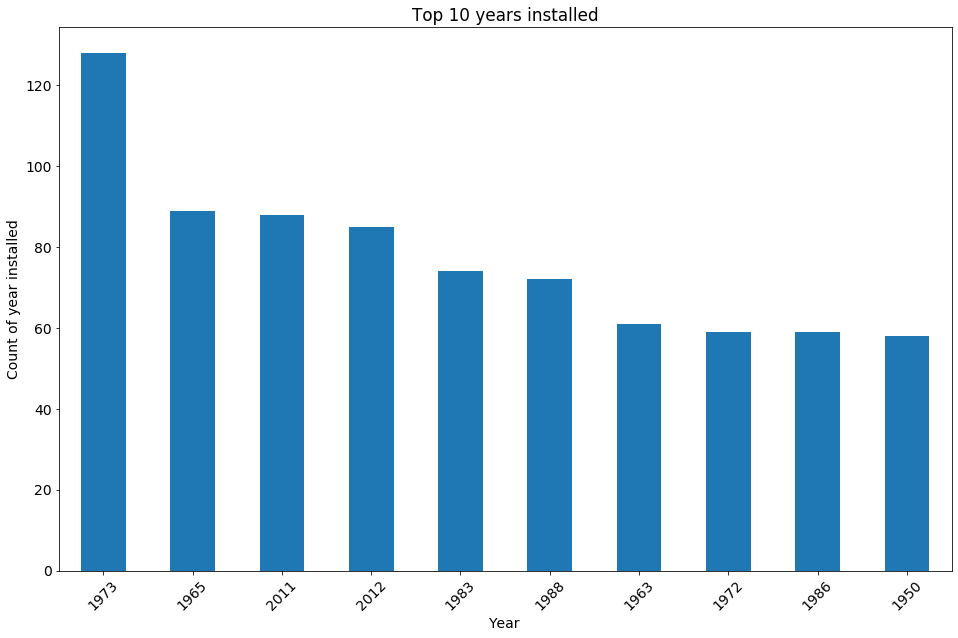

In [24]:
df.INSTYEAR.dropna().astype(int).value_counts().head(10).plot.bar()
plt.xticks(rotation=45)

plt.ylabel('Count of year installed')
plt.xlabel('Year')
plt.title('Top 10 years installed')
plt.show()

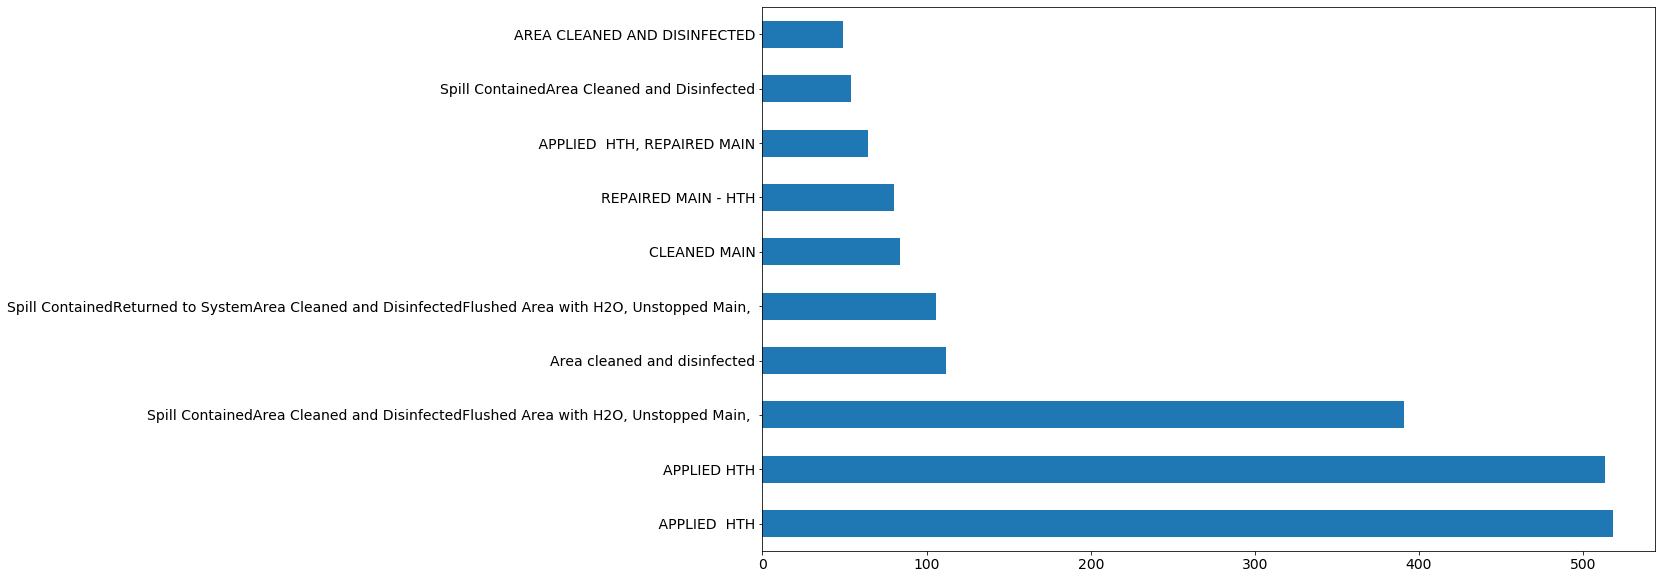

In [25]:
df.COMMENTS.value_counts().head(10).plot.barh()